<a href="https://colab.research.google.com/github/purvikabajaj/Neural-Networks/blob/master/CNN_Horses_vs_Humans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2020-08-10 13:19:56--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.97.128, 108.177.125.128, 74.125.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.97.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M  22.3MB/s    in 6.4s    

2020-08-10 13:20:03 (22.3 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [4]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2020-08-10 13:20:07--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.204.128, 108.177.97.128, 108.177.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘/tmp/validation-horse-or-human.zip’

/tmp/validation-hor 100%[===================>]  10.95M  11.2MB/s    in 1.0s    

2020-08-10 13:20:08 (11.2 MB/s) - ‘/tmp/validation-horse-or-human.zip’ saved [11480187/11480187]



In [5]:
import os 
import zipfile

In [6]:
#unzipping the data
local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp/horse-or-human')

local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp/validation-horse-or-human')

zip_ref.close()

In [7]:
#defining the subdirectories
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

In [8]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])
train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

validation_horse_names = os.listdir(validation_horse_dir)
print(validation_horse_names[:10])
validation_human_names = os.listdir(validation_human_dir)
print(validation_human_names[:10])

['horse16-7.png', 'horse01-6.png', 'horse41-1.png', 'horse07-4.png', 'horse02-1.png', 'horse49-7.png', 'horse02-7.png', 'horse49-0.png', 'horse31-3.png', 'horse06-6.png']
['human08-04.png', 'human03-00.png', 'human04-26.png', 'human11-04.png', 'human13-10.png', 'human03-22.png', 'human14-19.png', 'human03-27.png', 'human02-05.png', 'human10-02.png']
['horse5-405.png', 'horse4-495.png', 'horse5-360.png', 'horse5-181.png', 'horse5-164.png', 'horse4-403.png', 'horse5-076.png', 'horse5-589.png', 'horse3-397.png', 'horse4-000.png']
['valhuman05-27.png', 'valhuman04-03.png', 'valhuman04-10.png', 'valhuman04-04.png', 'valhuman01-12.png', 'valhuman03-08.png', 'valhuman03-03.png', 'valhuman05-02.png', 'valhuman05-15.png', 'valhuman03-06.png']


In [9]:
print('Horse Training Images: ',len(os.listdir(train_horse_dir)))
print('Human Training Images: ',len(os.listdir(train_human_dir)))

print('Horse Validation Images: ',len(os.listdir(validation_horse_dir)))
print('Human Validation Images: ',len(os.listdir(validation_human_dir)))

Horse Training Images:  500
Human Training Images:  527
Horse Validation Images:  128
Human Validation Images:  128


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/tmp/horse-or-human',
    target_size = (300,300),
    batch_size = 128,
    class_mode = 'binary'
)

Found 1027 images belonging to 2 classes.


In [12]:
import matplotlib.pyplot as plt
from keras.preprocessing import image

(300, 300, 3)


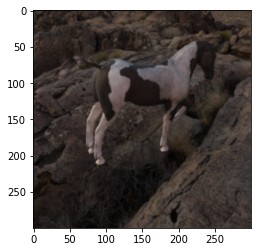

In [13]:
x,y = train_generator.next()
for i in range(0,1):
  image = x[i]
  plt.imshow(image)
  print(image.shape)

In [14]:
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    '/tmp/validation-horse-or-human',
    target_size = (300,300),
    batch_size = 32,
    class_mode = 'binary'
)

Found 256 images belonging to 2 classes.


(300, 300, 3)


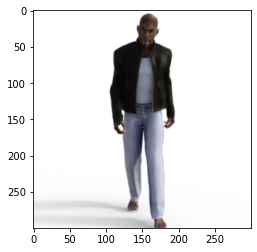

In [21]:
x, y = validation_generator.next()
for i in range(0,1):
  image = x[i]
  plt.imshow(image)
  print(image.shape)

In [15]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [16]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300,300,3)),
                                    tf.keras.layers.MaxPooling2D(2,2),

                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),

                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),

                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),

                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),

                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [18]:
from tensorflow.keras.optimizers import RMSprop

In [19]:
model.compile(
    optimizer = RMSprop(lr=0.001),
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [20]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 8,
    epochs = 15,
    verbose = 1,
    validation_data = validation_generator,
    validation_steps = 8,
    callbacks = tf.keras.callbacks.EarlyStopping(monitor='accuracy')
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15


KeyboardInterrupt: ignored

In [ ]:
from google.colab import files
from keras.preprocessing import image 

uploaded = files.upload()

for fn in uploaded.keys():
  path = '/content/'+fn
  img = image.load_img(path, target_size=(300,300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])

  if classes[0]>0.5:
    print('It is a human')
  else:
    print('It is a horse')